## Imports and config

In [12]:
import sklearn.datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
mpl.style.use("ggplot_updated.mplstyle") # default style has 12x10 inches
mpl.rcParams["figure.figsize"] = 6,4 # smaller graphs are fine in this project

## Load data

In [8]:
# data, target = sklearn.datasets.load_diabetes(return_X_y = True, as_frame = True) # test set (not real data)
temp = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", delimiter = "\t")
data = temp.drop(["Y"], axis = 1).convert_dtypes()
data.columns = data.columns.map(lambda x: x.lower())
target = temp.Y
###    to print description of features:
# bunch = sklearn.datasets.load_diabetes()
# print(bunch["DESCR"])

### Dataset information
Initial dataset with 10 features taken from 442 diabetes patients:
- age: patient's age in years
- sex: patient's sex
- bmi: patient's Body Mass Index
- bp: patient's average blood pressure
- s1: patient's T-cells
- s2: patient's ldl
- s3: patient's hdl
- s4: patient's tch
- s5: patient's ltg
- s6: patient's glu
Target value are represented in diseases' progression after one year of this baseline

### Descriptive stats of initial dataset

In [9]:
data.describe()
# data.dtypes
# data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


## Modelling testing

### Linear Regression

Quick test:

In [23]:
regr = linear_model.LinearRegression()
regr.fit(data, target)
print("Full set regression:")
print("\tIntercept: ", regr.intercept_)
# one intercept for all
for i, coef in enumerate(regr.coef_):
    print(f"\t{data.columns[i]}-coefficient: {coef}")
# one coefficient for each feature
print(f"Score full set: ", regr.score(data, target)) # coefficient of determination is returned by score (R²)

Full set regression:
	Intercept:  -334.56713851878703
	age-coefficient: -0.03636122422362417
	sex-coefficient: -22.85964809049839
	bmi-coefficient: 5.602962091923697
	bp-coefficient: 1.11680799331819
	s1-coefficient: -1.0899963340632226
	s2-coefficient: 0.7464504555142106
	s3-coefficient: 0.3720047150891368
	s4-coefficient: 6.5338319359903405
	s5-coefficient: 68.48312496478832
	s6-coefficient: 0.28011698932149454
Score full set:  0.5177484222203498


Coëfficient of determination R²: 1-(u/v)<br>
with:<br>
    u = ((y_true - y_pred)²).sum() (sum of the each difference between predicted value and real value squared)<br>
    v = ((y_true - y_true.mean())³).sum() (sum of each real value minus the real mean squared)<br>
This coëfficient being 1.0 shows perfect predictions, can be zero if model does the inverse of the results

In [70]:
regr = linear_model.LinearRegression()
random_state = None # provide int for repeatable results
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.85, test_size = 0.15, random_state = random_state)
regr.fit(X_train, y_train)
print("Train set regression:")
print("\tIntercept: ", regr.intercept_)
for i, coef in enumerate(regr.coef_):
    print(f"\t{data.columns[i]}-coefficient: {coef}")
print(f"Score test set: ", regr.score(X_test, y_test)) # random state off --> ranges from 0.20 - 0.64!

Train set regression:
	Intercept:  -308.28672453004145
	age-coefficient: -0.05460955765846675
	sex-coefficient: -25.866155083935336
	bmi-coefficient: 6.062371992443154
	bp-coefficient: 0.9471165179313576
	s1-coefficient: -0.7863898925991712
	s2-coefficient: 0.4490229838159365
	s3-coefficient: -0.021658075944313904
	s4-coefficient: 4.790256554825292
	s5-coefficient: 65.72276537875543
	s6-coefficient: 0.2823662371803133
Score test set:  0.34945034427030164


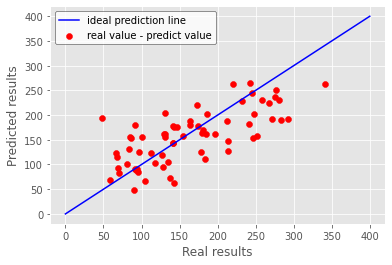

In [55]:
plt.clf()
plt.plot([0, 400], [0, 400], color = "blue", label = "ideal prediction line")
plt.scatter(y_test, regr.predict(X_test), color = "red", label = "real value - predict value")
plt.xlabel("Real results")
plt.ylabel("Predicted results")
plt.legend(loc = "upper left")

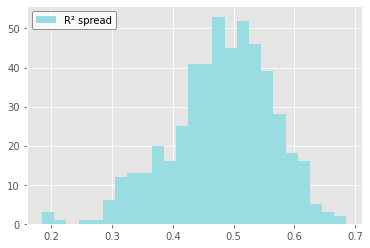

In [90]:
regr = linear_model.LinearRegression()
hist_res = list()
for x in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.85, test_size = 0.15, random_state = random_state)
    regr.fit(X_train, y_train)
    hist_res.append(regr.score(X_test, y_test))
plt.clf()
plt.hist(hist_res, bins = 25, color = "#99dde2", label = "R² spread")
plt.legend(loc = "upper left")
# quite some spread --> not enought samples, not enough correlation in general?

### Ridge/Lasso Regression

Ridge allows you to apply regularization (regularize coefficients to prevent overfitting --> basically punishing complex models), more specifically L2 regulatization.<br>
Method: <br>
<img src="images/ridge-L2regulatization.png"><br>
X = feature data (a x b) <br>
w = coëfficients for each feature (b x 1) <br>
&alpha; = regularization strength (scalar) <br>
a & b = number of samples & number of features <br>
So basically you take residual sum of squares (RSS) between predicted values and test values and sum it with a scalar times your coefficients squared, solve to minimum for coëfficients. This last addition is also called the penalty, the bigger your coëfficients are the bigger the penalty.

Lasso is also a kind of regularization but it is L1 regularization, this means that the last term is not squared:<br>
<img src="images/Lasso-L1_Regularization.png">

In [161]:
regr = linear_model.Ridge(alpha = 0.01)
random_state = 8
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.85, test_size = 0.15, random_state = random_state)
regr.fit(X_train, y_train)
print("Train set regression:")
print("\tIntercept: ", regr.intercept_)
for i, coef in enumerate(regr.coef_):
    print(f"\t{data.columns[i]}-coefficient: {coef}")
print(f"Score test set: ", regr.score(X_test, y_test))

Train set regression:
	Intercept:  -363.2802930821324
	age-coefficient: -0.022781187939337904
	sex-coefficient: -24.801060974263507
	bmi-coefficient: 5.739621097063665
	bp-coefficient: 1.2394526702440447
	s1-coefficient: -1.4787079804542924
	s2-coefficient: 1.0261596946099893
	s3-coefficient: 0.7529191000273878
	s4-coefficient: 8.842249749470128
	s5-coefficient: 72.49732359304072
	s6-coefficient: 0.3878011708291646
Score test set:  0.4117451512637559


Text(0, 0.5, 'Coefficient value')

<Figure size 432x288 with 0 Axes>

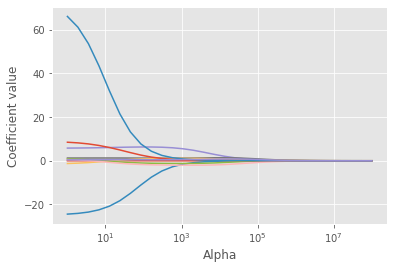

In [181]:
random_state = 8
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.85, test_size = 0.15, random_state = random_state)
alphas = np.logspace(0,8, 30, base = 10)
coefficients = []
for x in alphas:
    regr = linear_model.Ridge(x)
    regr.fit(X_train, y_train)
    coefficients.append(regr.coef_)
plt.clf()
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(alphas, coefficients)
ax.set_xlabel("Alpha")
ax.set_ylabel("Coefficient value")
# as can be seen bigger alpha value leads to more regularised coefficients (as the penalty gets bigger)